<a href="https://colab.research.google.com/github/SerraTalas/MachineLearningProjects/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
53/53 [==============================] - 2s 18ms/step - loss: 0.2598 - accuracy: 0.9424 - val_loss: 0.1126 - val_accuracy: 0.9802
Epoch 2/20
53/53 [==============================] - 1s 19ms/step - loss: 0.1353 - accuracy: 0.9745 - val_loss: 0.0991 - val_accuracy: 0.9817
Epoch 3/20
53/53 [==============================] - 1s 9ms/step - loss: 0.1158 - accuracy: 0.9792 - val_loss: 0.0919 - val_accuracy: 0.9812
Epoch 4/20
53/53 [==============================] - 0s 7ms/step - loss: 0.1083 - accuracy: 0.9757 - val_loss: 0.0883 - val_accuracy: 0.9814
Epoch 5/20
53/53 [==============================] - 1s 10ms/step - loss: 0.1062 - accuracy: 0.9798 - val_loss: 0.0874 - val_accuracy: 0.9817
Epoch 6/20
53/53 [==============================] - 1s 10ms/step - loss: 0.0948 - accuracy: 0.9804 - val_loss: 0.0825 - val_accuracy: 0.9812
Epoch 7/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0873 - accuracy: 0.9810 - val_loss: 0.0797 - val_accuracy: 0.9819
Epoch 8/20
53/53

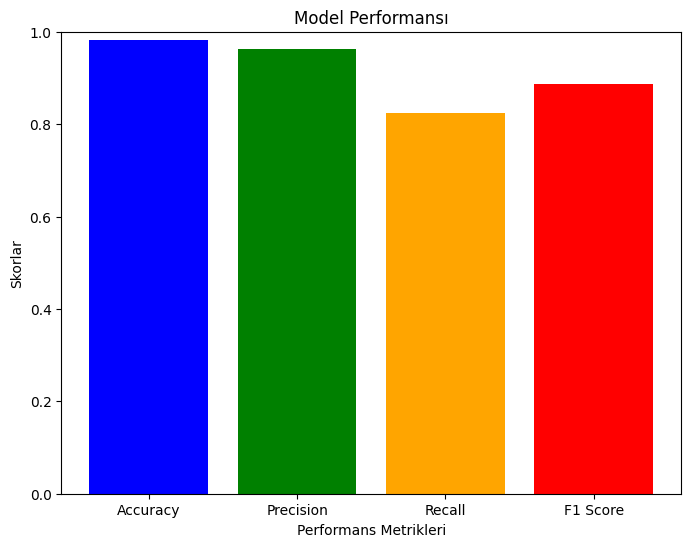

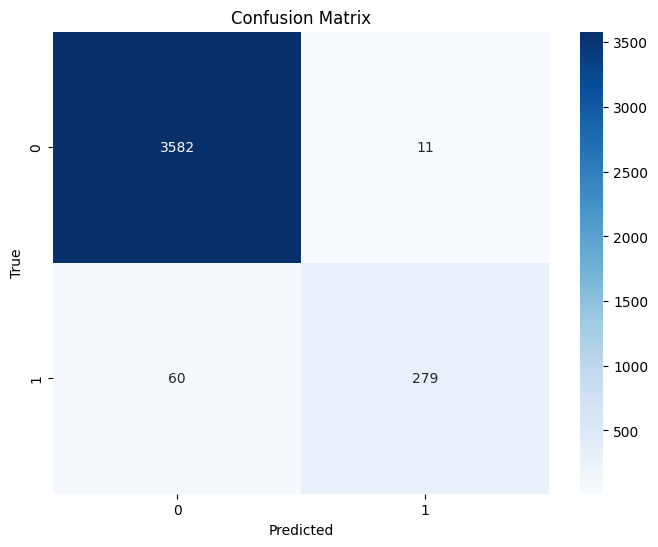

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical

# Load the data
df = pd.read_csv('/content/drive/MyDrive/verikumesi2.csv')

# Select specific columns (all columns from index 1 to 29)
x = df.iloc[:, 1:30].values
y = df.iloc[:, 30].values

# Data preprocessing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, stratify=y, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN (assuming features are 1-dimensional)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the CNN model
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Performance metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performansı')
plt.xlabel('Performans Metrikleri')
plt.ylabel('Skorlar')
plt.ylim(0, 1)
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
